**IMPORTANTE: caso já tenha baixado a pasta colmap_project, inicie pela etapa 5.1 para as visualizações**

In [1]:
import pycolmap
from pathlib import Path
import shutil
import urllib.request
import zipfile
import io
import matplotlib.pyplot as plt
from PIL import Image

### Passo 1: Download e Preparação do Conjunto de Dados

Para este exemplo, usaremos o conjunto de dados "fox" do site oficial do COLMAP. O código abaixo irá baixá-lo e extraí-lo para a nossa pasta de imagens.

**IMPORTANTE: rodar a célula abaixo somente se for testar o código com o database de exemplo.**

In [2]:
# Imports necessários
from pathlib import Path
import shutil, io, zipfile, urllib.request, urllib.error
from PIL import Image
import matplotlib.pyplot as plt

# Limpa execuções anteriores
project_path = Path('colmap_project')
if project_path.exists():
    shutil.rmtree(project_path)

# Diretórios
image_path = project_path / 'images'
database_path = project_path / 'database.db'
output_path = project_path / 'sparse'
project_path.mkdir(parents=True, exist_ok=True)
image_path.mkdir(exist_ok=True)
output_path.mkdir(exist_ok=True)
print(f"Diretórios do projeto criados em: {project_path.resolve()}")

# URLs de datasets oficiais (substituem o antigo 'fox.zip')
dataset_urls = [
    # South Building (preferido)
    "https://github.com/colmap/colmap/releases/download/3.11.1/south-building.zip",
    # Fallback: Gerrard Hall
    "https://github.com/colmap/colmap/releases/download/3.11.1/gerrard-hall.zip",
]

# Função para baixar conteúdo em memória
def fetch(url):
    print(f"Tentando baixar: {url}")
    with urllib.request.urlopen(url) as resp:
        return resp.read()

# Baixa o primeiro dataset disponível
data = None
last_err = None
for url in dataset_urls:
    try:
        data = fetch(url)
        print("Download concluído.")
        break
    except urllib.error.HTTPError as e:
        print(f"Falhou ({e.code}): {url}")
        last_err = e
    except urllib.error.URLError as e:
        print(f"Falhou (rede): {url} -> {e.reason}")
        last_err = e

if data is None:
    raise RuntimeError(f"Não foi possível baixar nenhum dataset. Último erro: {last_err}")

# Extrai apenas arquivos de imagem para image_path/
print("Extraindo imagens...")
valid_exts = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')
with zipfile.ZipFile(io.BytesIO(data)) as z:
    n_imgs = 0
    for member in z.infolist():
        name = member.filename
        # Ignora diretórios
        if name.endswith('/'):
            continue
        # Mantém apenas imagens (em qualquer subpasta do zip)
        if name.lower().endswith(valid_exts):
            # Lê do zip e grava achatando a árvore em image_path/
            with z.open(member) as src:
                out_file = image_path / Path(name).name
                with open(out_file, 'wb') as dst:
                    dst.write(src.read())
            n_imgs += 1

print(f"Extração concluída. {n_imgs} imagens salvas em {image_path}")

# Visualiza algumas imagens
image_files = sorted(image_path.glob('*'))
if len(image_files) == 0:
    raise RuntimeError("Nenhuma imagem foi encontrada após a extração.")

fig, axes = plt.subplots(1, min(4, len(image_files)), figsize=(16, 4))
if not isinstance(axes, (list, tuple)):
    axes = [axes]
for i, img_file in enumerate(image_files[:len(axes)]]):
    img = Image.open(img_file)
    axes[i].imshow(img)
    axes[i].set_title(img_file.name)
    axes[i].axis('off')
plt.tight_layout()
plt.show()

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (1353300867.py, line 82)

### Passo 1 (Alterado): Usando Imagens de uma Pasta Local

Esta etapa agora aponta para um diretório local chamado "imagens-t2/Imagens4".

Ação Necessária: Crie uma pasta chamada imagens-t2/Imagens4 no mesmo diretório onde este notebook está salvo e coloque suas imagens de objeto nela.

**IMPORTANTE: rodar a célula abaixo somente se for executar o código com as imagens capturadas para o projeto.**

Diretórios do projeto para a base de dados e saídas criados em: /home/viniasbr/Repos/MC949_Visao_Computacional/Trabalho 2/colmap_project
Usando imagens da pasta local: '/home/viniasbr/Repos/MC949_Visao_Computacional/Trabalho 2/imagens-t2/Imagens3'
Encontradas 132 imagens.


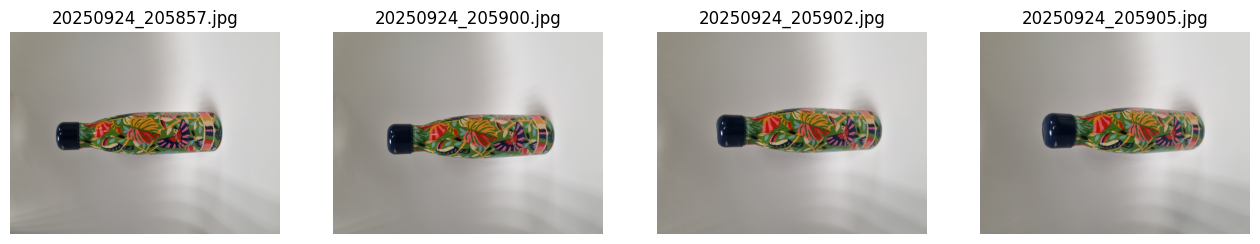

In [3]:
# Limpa execuções anteriores para garantir um começo limpo
if Path('colmap_project').exists():
    shutil.rmtree('colmap_project')

# Define os diretórios para os arquivos gerados pelo COLMAP
project_path = Path('colmap_project')
database_path = project_path / 'database.db'
output_path = project_path / 'sparse'

# Cria os diretórios para o projeto (exceto o de imagens, que será local)
project_path.mkdir(exist_ok=True)
output_path.mkdir(exist_ok=True)

print(f"Diretórios do projeto para a base de dados e saídas criados em: {project_path.resolve()}")

# Define o caminho para a pasta de imagens local
image_path = Path('imagens-t2/Imagens3')

# Verifica se a pasta existe e não está vazia
if not image_path.exists() or not any(image_path.iterdir()):
    print("="*80)
    print(f"ERRO: A pasta '{image_path}' não foi encontrada ou está vazia.")
    print("Por favor, crie esta pasta no mesmo diretório do notebook e adicione suas imagens.")
    print("="*80)
    # Lança um erro para parar a execução do notebook
    raise FileNotFoundError(f"A pasta de imagens '{image_path}' está faltando ou vazia.")
else:
    print(f"Usando imagens da pasta local: '{image_path.resolve()}'")

# Vamos visualizar algumas das imagens para confirmar
image_files = sorted(list(image_path.glob('*.[jJ][pP][gG]')) + list(image_path.glob('*.[pP][nN][gG]')))
print(f"Encontradas {len(image_files)} imagens.")

fig, axes = plt.subplots(1, min(4, len(image_files)), figsize=(16, 4))
if len(image_files) > 1:
    for i, img_file in enumerate(image_files[:4]):
        img = Image.open(img_file)
        axes[i].imshow(img)
        axes[i].set_title(img_file.name)
        axes[i].axis('off')
elif len(image_files) == 1:
    img = Image.open(image_files[0])
    axes.imshow(img)
    axes.set_title(image_files[0].name)
    axes.axis('off')
    
plt.show()

### Passo 2: Extração de Features (Keypoints)

Neste passo, o COLMAP analisará cada imagem para encontrar pontos de interesse distintos (features). Pelo que foi pesquisado, o algoritmo usado é o SIFT.

Atenção: Se você tiver uma GPU NVIDIA com CUDA configurado, pode definir use_gpu=True para uma aceleração massiva.

In [4]:
# Configurações para a extração de features
feature_options = pycolmap.SiftExtractionOptions()
feature_options.use_gpu = True # Mude para True se tiver uma GPU compatível
feature_options.num_threads = 6

# Executa a extração
pycolmap.extract_features(database_path, image_path, sift_options=feature_options)

print("Extração de features concluída.")

I20250930 21:54:05.829331 140123423233728 misc.cc:44] 
Feature extraction
I20250930 21:54:05.829868 140123147228864 sift.cc:727] Creating SIFT CPU feature extractor
I20250930 21:54:05.829923 140123138836160 sift.cc:727] Creating SIFT CPU feature extractor
I20250930 21:54:05.829992 140123130443456 sift.cc:727] Creating SIFT CPU feature extractor
I20250930 21:54:05.830044 140123122050752 sift.cc:727] Creating SIFT CPU feature extractor
I20250930 21:54:05.830100 140122905376448 sift.cc:727] Creating SIFT CPU feature extractor
I20250930 21:54:05.830165 140122896983744 sift.cc:727] Creating SIFT CPU feature extractor
I20250930 21:54:10.286040 140122888591040 feature_extraction.cc:259] Processed file [1/132]
I20250930 21:54:10.286132 140122888591040 feature_extraction.cc:262]   Name:            20250924_205857.jpg
I20250930 21:54:10.286139 140122888591040 feature_extraction.cc:271]   Dimensions:      4000 x 3000
I20250930 21:54:10.286141 140122888591040 feature_extraction.cc:274]   Camera:  

Extração de features concluída.


I20250930 21:55:11.845262 140122888591040 feature_extraction.cc:259] Processed file [131/132]
I20250930 21:55:11.845317 140122888591040 feature_extraction.cc:262]   Name:            20250924_210629.jpg
I20250930 21:55:11.845325 140122888591040 feature_extraction.cc:271]   Dimensions:      4000 x 3000
I20250930 21:55:11.845330 140122888591040 feature_extraction.cc:274]   Camera:          #1 - SIMPLE_RADIAL
I20250930 21:55:11.845332 140122888591040 feature_extraction.cc:277]   Focal Length:    3004.39px (Prior)
I20250930 21:55:11.845342 140122888591040 feature_extraction.cc:281]   Features:        2425
I20250930 21:55:11.879153 140122888591040 feature_extraction.cc:259] Processed file [132/132]
I20250930 21:55:11.879197 140122888591040 feature_extraction.cc:262]   Name:            20250924_210630.jpg
I20250930 21:55:11.879203 140122888591040 feature_extraction.cc:271]   Dimensions:      4000 x 3000
I20250930 21:55:11.879205 140122888591040 feature_extraction.cc:274]   Camera:          #1

### Passo 3: Correspondência de Features (Matching)

Agora, o COLMAP irá comparar as features extraídas entre todas as imagens para encontrar correspondências (matches). Pelo que foi pesquisado, o algoritmo utilizado é: Nearest Neighbor + Verificação Geométrica com RANSAC.

In [5]:
# Configurações para a correspondência
matcher_options = pycolmap.SiftMatchingOptions()
matcher_options.use_gpu = True # Mude para True se tiver uma GPU compatível
matcher_options.num_threads = 6
two_view_opts = pycolmap.TwoViewGeometryOptions()
two_view_opts.ransac.max_error = 1.0

# Executa a correspondência
pycolmap.match_exhaustive(database_path, sift_options=matcher_options, verification_options= two_view_opts)

print("Correspondência de features concluída.")

I20250930 21:55:52.615638 140123423233728 misc.cc:44] 
Feature matching
I20250930 21:55:52.615976 140122888591040 sift.cc:1434] Creating SIFT CPU feature matcher
I20250930 21:55:52.616037 140122896983744 sift.cc:1434] Creating SIFT CPU feature matcher
I20250930 21:55:52.616086 140122905376448 sift.cc:1434] Creating SIFT CPU feature matcher
I20250930 21:55:52.616171 140123414841024 sift.cc:1434] Creating SIFT CPU feature matcher
I20250930 21:55:52.616230 140123406448320 sift.cc:1434] Creating SIFT CPU feature matcher
I20250930 21:55:52.616302 140123398055616 sift.cc:1434] Creating SIFT CPU feature matcher
I20250930 21:55:52.616732 140123423233728 pairing.cc:173] Generating exhaustive image pairs...
I20250930 21:55:52.616762 140123423233728 pairing.cc:206] Matching block [1/3, 1/3]
I20250930 21:56:00.287726 140123423233728 feature_matching.cc:47] in 7.671s
I20250930 21:56:00.287765 140123423233728 pairing.cc:206] Matching block [1/3, 2/3]
I20250930 21:56:13.663306 140123423233728 feature

Correspondência de features concluída.


I20250930 21:57:43.629973 140123423233728 feature_matching.cc:47] in 2.683s
I20250930 21:57:43.630011 140123423233728 timer.cc:91] Elapsed time: 1.850 [minutes]


### Passo 4: Reconstrução Esparsa (Structure from Motion)

Este é o passo principal. Usando as correspondências de features, o pycolmap executará o mapeamento incremental (SfM) para estimar simultaneamente:

- A estrutura 3D da cena (na forma de uma nuvem de pontos esparsa).

- Os parâmetros intrínsecos e extrínsecos da câmera para cada imagem (ou seja, onde cada foto foi tirada).

In [6]:
# Executa o mapeamento incremental (reconstrução esparsa)
reconstructions = pycolmap.incremental_mapping(database_path, image_path, output_path)

print("Reconstrução esparsa concluída.")

# Imprime um resumo do maior modelo reconstruído
if reconstructions and 0 in reconstructions:
    print("\nResumo da Reconstrução:")
    print(reconstructions[0].summary())
else:
    print("\nA reconstrução falhou. Verifique se as imagens têm sobreposição suficiente e boa qualidade.")

I20250930 21:57:59.120511 140125108535360 incremental_pipeline.cc:254] Loading database
I20250930 21:57:59.121900 140125108535360 database_cache.cc:66] Loading rigs...
I20250930 21:57:59.121950 140125108535360 database_cache.cc:76]  1 in 0.000s
I20250930 21:57:59.121960 140125108535360 database_cache.cc:84] Loading cameras...
I20250930 21:57:59.121969 140125108535360 database_cache.cc:102]  1 in 0.000s
I20250930 21:57:59.121971 140125108535360 database_cache.cc:110] Loading frames...
I20250930 21:57:59.122030 140125108535360 database_cache.cc:127]  132 in 0.000s
I20250930 21:57:59.122050 140125108535360 database_cache.cc:135] Loading matches...
I20250930 21:57:59.126988 140125108535360 database_cache.cc:140]  4873 in 0.005s
I20250930 21:57:59.127021 140125108535360 database_cache.cc:156] Loading images...
I20250930 21:57:59.132269 140125108535360 database_cache.cc:241]  132 in 0.005s (connected 132)
I20250930 21:57:59.132307 140125108535360 database_cache.cc:252] Building correspondenc

Reconstrução esparsa concluída.

Resumo da Reconstrução:
Reconstruction:
	num_rigs = 1
	num_cameras = 1
	num_frames = 132
	num_reg_frames = 132
	num_images = 132
	num_points3D = 19723
	num_observations = 185068
	mean_track_length = 9.38336
	mean_observations_per_image = 1402.03
	mean_reprojection_error = 0.923815


I20250930 21:59:46.973282 140125108535360 incremental_pipeline.cc:584] Keeping successful reconstruction
I20250930 21:59:46.975033 140125108535360 timer.cc:91] Elapsed time: 1.798 [minutes]


### Passo 5.1 : Visualização da Orientação da Câmera 

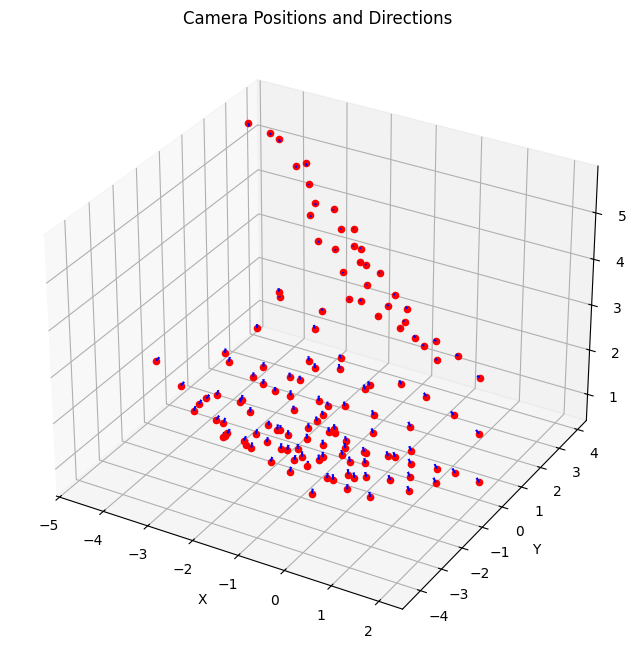

In [7]:
import numpy as np

project_path = Path('colmap_project')
database_path = project_path / 'database.db'
output_path = project_path / 'sparse/0'
image_path = Path('imagens-t2/Imagens4')

reconstruction = pycolmap.Reconstruction(output_path) 

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for image_id, image in reconstruction.images.items():
    #Posição da câmera
    cam_fromworld = image.cam_from_world()
    camera_pos = cam_fromworld.translation
    ax.scatter(camera_pos[0], camera_pos[1], camera_pos[2], c='red', marker='o')

    # Calcula a orientação da câmera
    rotation_matrix = cam_fromworld.rotation.matrix()
    forward_dir = rotation_matrix @ np.array([0, 0, 1])  # Vetor forward da câmera
    ax.quiver(
        camera_pos[0], camera_pos[1], camera_pos[2],
        forward_dir[0], forward_dir[1], forward_dir[2],
        length=0.1, color='blue', arrow_length_ratio=0.1
    )

# Axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Camera Positions and Directions')
plt.show()

### Passo 5.2: Visualização dos Resultados

Vamos carregar o modelo esparso que acabamos de criar e visualizá-lo. Inicialmente, a visualização é feita de forma estática com matplotlib. Em seguida, você poderá usar o mouse para rotacionar, dar zoom e mover a cena 3D a partir do plot com plotly. Os cones em vermelho representam as câmeras.

In [8]:
reconstruction = pycolmap.Reconstruction(output_path)
points_3d = []
for point3D_id, point3D in reconstruction.points3D.items():
    points_3d.append(point3D.xyz)  # [x, y, z] 

points_3d = np.array(points_3d)  
print(f"Números de pontos 3D: {len(points_3d)}")
print(f"Coordenadas do primeiro ponto: {points_3d[0]}")

Números de pontos 3D: 19723
Coordenadas do primeiro ponto: [ 4.61689593 -0.13756764  4.9494096 ]


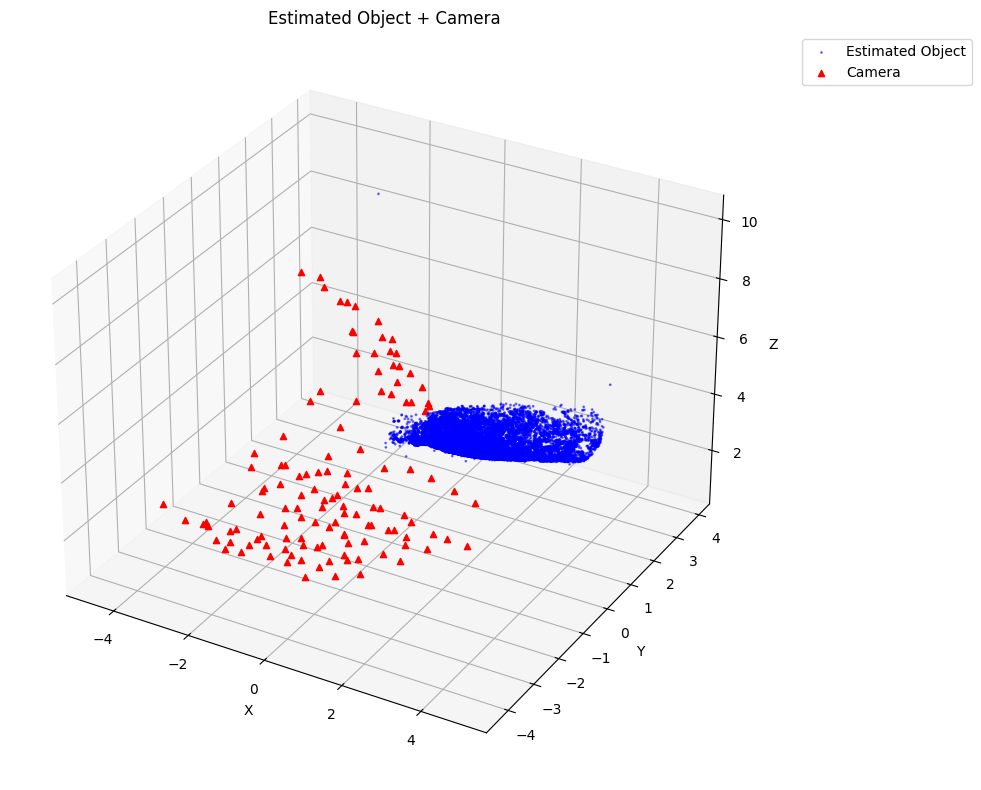

In [9]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    points_3d[:,0],  # X
    points_3d[:,1],  # Y
    points_3d[:,2],  # Z
    s=1,  
    c='blue',  
    alpha=0.5,  
    label="Estimated Object"
)

camera_plotted = False
for image in reconstruction.images.values():
    cam_fromworld=image.cam_from_world()
    cam_pos=cam_fromworld.translation
    if not camera_plotted:
        ax.scatter(cam_pos[0], cam_pos[1], cam_pos[2], c='red', marker='^', label="Camera")
        camera_plotted = True
    else:
        ax.scatter(cam_pos[0], cam_pos[1], cam_pos[2], c='red', marker='^')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Estimated Object + Camera")
plt.tight_layout()  
plt.show()

No plot 3D, a ponta do cone representa a localização da lente da câmera.

In [10]:
import plotly.graph_objects as go

# Coordenadas das câmeras
cam_x_coords, cam_y_coords, cam_z_coords = [], [], []

for image in reconstruction.images.values():
    cam_fromworld = image.cam_from_world()
    cam_pos = cam_fromworld.translation

    cam_x_coords.append(cam_pos[0])
    cam_y_coords.append(cam_pos[1])
    cam_z_coords.append(cam_pos[2])

fig = go.Figure()
fig.add_trace(
    go.Scatter3d(
        x=points_3d[:, 0],
        y=points_3d[:, 1],
        z=points_3d[:, 2],
        mode='markers',
        marker=dict(size=1.5, color='blue', opacity=0.6),
        name='Estimated Object'))

# Adiciona as cameras

fig.add_trace(
    go.Cone(
        x=cam_x_coords, y=cam_y_coords, z=cam_z_coords,
        u=-np.array(cam_x_coords), v=-np.array(cam_y_coords), w=-np.array(cam_z_coords),
        sizemode="absolute", sizeref=20, anchor="tip",
        colorscale='Reds', showscale=False, name='Camera',
        showlegend=True))

fig.update_layout(
    title_text="Visualização da Nuvem Esparsa 3D",
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectratio=dict(x=1, y=1, z=1)
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    showlegend=True,
    legend=dict(
        x=0.8,
        y=0.9,
        xanchor='center',
        yanchor='top',
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='rgba(0, 0, 0, 0.5)',
        borderwidth=1
    )
)

fig.show()

### (Opcional) Passo 6: Reconstrução Densa (Multi-View Stereo)

O resultado acima é uma "nuvem de pontos esparsa". Para obter um modelo 3D mais detalhado, podemos realizar a reconstrução densa. Isso gera um mapa de profundidade para cada imagem e depois os funde em uma nuvem de pontos densa.

**AVISO: Este processo é computacionalmente muito mais intensivo.**

In [11]:
# Verifica se a reconstrução esparsa existe antes de prosseguir
if 'reconstruction' in locals() and reconstruction and not reconstruction.is_empty():
    # Define o diretório para a reconstrução densa
    dense_path = project_path / 'dense'
    dense_path.mkdir(exist_ok=True)

    # 1. Desdistorcer as imagens
    pycolmap.undistort_images(dense_path, output_path, image_path)

    # 2. Executar o patch_match_stereo para criar mapas de profundidade
    pycolmap.patch_match_stereo(dense_path)

    # 3. Fundir os mapas de profundidade em uma nuvem de pontos densa
    pycolmap.stereo_fusion(dense_path / 'fused.ply', dense_path)

    print("\nReconstrução densa concluída!")
    print(f"O modelo 3D denso foi salvo em: {dense_path / 'fused.ply'}")
    print("Você pode abrir este arquivo .ply com um visualizador 3D como o MeshLab.")
else:
    print("\nPulando a reconstrução densa porque o modelo esparso não foi gerado com sucesso.")

AttributeError: 'pycolmap._core.Reconstruction' object has no attribute 'is_empty'

In [27]:
if 'reconstruction' in locals() and reconstruction and reconstruction.num_reg_images() > 0:
    print(f"Reconstrução válida encontrada com {reconstruction.num_reg_images()} imagens registradas e {reconstruction.num_points3D()} pontos 3D.")
    
    # Define o diretório para a reconstrução densa
    dense_path = project_path / 'dense'
    dense_path.mkdir(exist_ok=True)

    print(f"Diretório para reconstrução densa será: {dense_path}")
    
    # 1. Desdistorcer as imagens
    pycolmap.undistort_images(dense_path, output_path, image_path)

    # 2. Executar o patch_match_stereo para criar mapas de profundidade
    pycolmap.patch_match_stereo(dense_path)

    # 3. Fundir os mapas de profundidade em uma nuvem de pontos densa
    pycolmap.stereo_fusion(dense_path / 'fused.ply', dense_path)

    print("\nReconstrução densa concluída!")
    print(f"O modelo 3D denso foi salvo em: {dense_path / 'fused.ply'}")
    print("Você pode abrir este arquivo .ply com um visualizador 3D como o MeshLab.")
else:
    print("\nPulando a reconstrução densa porque o modelo esparso não foi gerado com sucesso.")

Reconstrução válida encontrada com 92 imagens registradas e 34347 pontos 3D.
Diretório para reconstrução densa será: colmap_project\dense


RuntimeError: [mvs.cc:40] PatchMatch requires CUDA but COLMAP was not compiled with it.